Binary Classifiers:
    Evaluating Binary Classifier Predictions
	Evaluating Binary Classifier Thresholds
	Evaluating Multiclass Classifier Predictions

Evaluating Binary Classifier Predictions:
    TP, TN, FP, FN
    ->TP represents the number of True Positives. This refers to the total number of observations that belong to the positive class and have been predicted correctly.
    ->TN represents the number of True Negatives. This is the total number of observations that belong to the negative class and have been predicted correctly.
    ->FP is the number of False Positives. It is also known as a Type 1 Error. This is the total number of observations that have been predicted to belong to the positive class, but instead, actually, belong to the negative class.
    model -> cat , test image -> dog (It is a cat)
    ->FN is the number of False Negatives. It may be
    referred to as a Type 2 Error.
    model-> cat , test image -> cat (It is a dog)
     Refer doc: https://github.com/VedaVinothiniShastra/DS_PT_1/blob/master/Spec-DS/Day%2015.ipynb
    Precision 
    Recall
    F1 Score
    Confusion Matrix
    ROC Curve
    Log loss

Evaluating Multiclass Classifier Predictions
    1.all input data is not balanced, hence the issue of Imbalanced Classes
    2.With the Accuracy Evaluation Metric removed from our options, we specifically turn to Precision, Recall, and F1 Scores
    3.We use parameter
    options in Python, which are used for aggregating the evaluation values by averaging them. 
    4.The three main options that we have available to us are:
        a._macro – Here we specify to the compiler to calculate the mean of metric scores for each class in the dataset, weighting each class equally.
        b._weighted – We calculate the mean of metric scores for each class, and we weigh each class directly proportional to its size in the dataset.
        c._micro – Here we calculate the mean of metric
        scores for each OBSERVATION in the dataset.

Regression Models	
    Visualizing a Classifier’s Performance
	Evaluating Regression Models
	Evaluating Clustering Models

In [4]:
#Visualizing a Classifier’s Performance

import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
cancer = datasets.load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
classifier = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
print(classifier.score(X_test, y_test))
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))

0.956140350877193
[[39  4]
 [ 1 70]]


Evaluation metrix in regression:
1.Mean Absolute Error(MAE)
->MAE is a very simple metric which calculates the absolute difference between actual and predicted values
    Advantages of MAE
        1.The MAE you get is in the same unit as the output variable.
        2.It is most Robust to outliers.
    Disadvantages of MAE
    1.The graph of MAE is not differentiable so we have to apply various optimizers like Gradient descent which can be differentiable.
    
2.Mean Squared Error(MSE)
->Mean squared error states that finding the squared difference between actual and predicted value
    Advantages of MSE
    1.The graph of MSE is differentiable, so you can easily use it as a loss function.
    Disadvantages of MSE
    1.The value you get after calculating MSE is a squared unit of output. for example, the output variable is in meter(m) then after calculating MSE the output we get is in meter squared.
    2.If you have outliers in the dataset then it penalizes the outliers most and the calculated MSE is bigger. So, in short, It is not Robust to outliers which were an advantage in MAE.

3.RMSE
->simple square root of mean squared error
    Advantages of RMSE
     1.The output value you get is in the same unit as the required output variable which makes interpretation of loss easy.
    Disadvantages of RMSE
    1.It is not that robust to outliers as compared to MAE.
    for performing RMSE we have to NumPy NumPy square root function over MSE.
4.RMSLE- Root Mean Squared Log Error -> Used in all ML proj
log of calculated RMSE error and resultant we get as RMSLE

5.R squared
R2 squared is also known as Coefficient of Determination or sometimes also known as Goodness of fit.
R^2=1- SSR/SSM (SSR->Squared sum error of regression line, SSM->Squared sum error of mean line)
0-> less
0.8-.normal
1->Perfect
Cons: If u add new features it will start from first
6.Adjusted R Squares
R^2a = 1 - ((1-r2)*(n-1)/(n-k-1))
n-> no of observation
k=no of independent variables
R^2a = Adjuested R^2a

#MAE
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

#MSE
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

#RMSE
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
#RMSLE
print("RMSLE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))
#R Sqaured
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

#Adjusted R^2
n=40
k=2
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print(adj_r2_score)

In [7]:
#Evaluating Regression Models

import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
cancer = datasets.load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
clf = LogisticRegression(max_iter=10000, random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
print("MAE",mean_absolute_error(y_test,y_pred))
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("RMSLE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print("R Squared",r2)

MAE 0.043859649122807015
MSE 0.043859649122807015
RMSE 0.20942695414584775
RMSLE -1.5633802679801976
R Squared 0.8132983950212905


Evaluation metrix for clustering

1.Adjusted Rand Index
ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)

from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(target, model.labels_)
print(ari)


2.Rand Index
RI = (number of agreeing pairs) / (number of pairs)

from sklearn.metrics import rand_score
ris = rand_score(target, model.labels_)
print(ris)

3.Silhouette Score aka Silhouette Coefficient
-1 ->poor
1-> good
0-> Overlappinf of clusters

from sklearn.metrics import silhouette_score
ss = silhouette_score(feature, model.labels_)
print(ss)

4.Davies-Bouldin Index
ratio of within-cluster distances to between-cluster distances
0-> poor
1->good

from sklearn.metrics import davies_bouldin_score
dbs = davies_bouldin_score(feature, model.labels_)
print(dbs)


5.Mutual Information

Mutual Information between two clusters is a measure of the similarity between two labels of the same data

from sklearn.metrics import mutual_info_score
mis = mutual_info_score(target, model.labels_)
print(mis)


C:\Users\bjawa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ARI 0.7812362998684788
RI 0.9198396793587175
Silhouette 0.7328381899726921
Davies Bouldin 0.3389800864889033
Mutual Information  1.3321790402101221


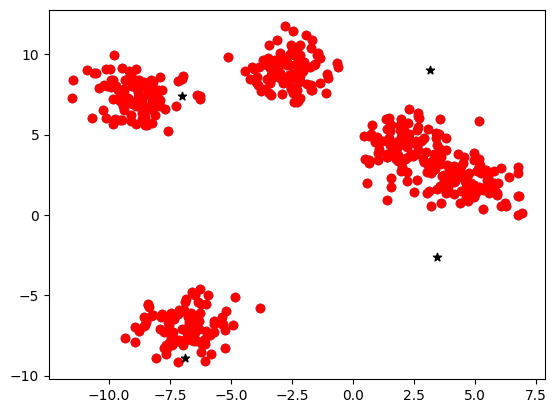

In [13]:
#Evaluating Clustering Models
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

feature, target = make_blobs(n_samples=500,centers=5,random_state=42,shuffle=False)
plt.scatter(feature[:, 0], feature[:, 1])
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4)
model.fit(feature)
plt.scatter(feature[:, 0], feature[:, 1], color="r")
plt.scatter(model.cluster_centers_[1],model.cluster_centers_[3],color="k", marker="*")
plt.scatter(model.cluster_centers_[2],model.cluster_centers_[0],color="k", marker="*")

from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(target, model.labels_)
print("ARI",ari)
from sklearn.metrics import rand_score

ris = rand_score(target, model.labels_)
print("RI",ris)
from sklearn.metrics import silhouette_score

ss = silhouette_score(feature, model.labels_)
print("Silhouette",ss)
from sklearn.metrics import davies_bouldin_score

dbs = davies_bouldin_score(feature, model.labels_)
print("Davies Bouldin",dbs)
from sklearn.metrics import mutual_info_score

mis = mutual_info_score(target, model.labels_)
print("Mutual Information ",mis)
